# Introduction 

YouTube comment sections are often targeted by spam messages containing promotional links, misleading content, or repeated phrases. Manual moderation is inefficient due to the volume and diversity of comments.

This project investigates the effectiveness of machine learning techniques for detecting spam comments using the YouTube Spam Collection dataset from the UCI Machine Learning Repository. Both unsupervised learning and supervised learning approaches are applied to explore patterns in comment text and to build predictive spam classifiers.

# Objectives
- To explore patterns in YouTube comments using unsupervised learning
- To build supervised models for spam classification
- To compare model performance across different YouTube datasets
- To evaluate models using appropriate classification metrics


# Dataset

The YouTube Spam Collection consists of five datasets, each representing comments from different YouTube channels. Each comment is labeled as spam (1) or non-spam/ ham (0).

### Dataset information
| Dataset | YouTube ID | # Spam | # Ham | Total | 
|-----------|---------------|-------|------|------| 
| Psy | 9bZkp7q19f0 | 175 | 175 | 350 |  
| KatyPerry | CevxZvSJLk8 | 175 | 175 | 350 |  
| LMFAO | KQ6zr6kCPj8 | 236 | 202 | 438 |  
| Eminem | uelHwf8o7_U | 245 | 203 | 448 |  
| Shakira |pRpeEdMmmQ0 | 174 | 196 | 370 |  

### Structure
1. Introduction
2. Dataset Description
3. Data Preprocessing
4. Unsupervised Learning Analysis
5. Supervised Learning Models
6. Cross-Dataset Comparison
7. Error Analysis
8. Discussion & Limitations
9. Conclusion

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import wordcloud
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("Libraries are loaded")

Libraries are loaded


In [11]:
data_dir = Path("data\\raw")

datasets = {}
file_mappings = {
    'Psy': 'Youtube01-Psy.csv',
    'KatyPerry': 'Youtube02-KatyPerry.csv', 
    'LMFAO': 'Youtube03-LMFAO.csv',
    'Eminem': 'Youtube04-Eminem.csv',
    'Shakira': 'Youtube05-Shakira.csv'
}

print("Loading datasets...")
for celeb, filename in file_mappings.items():
    file_path = data_dir / filename
    datasets[celeb] = pd.read_csv(file_path)
    print(f"Dataset: {celeb}")
    print("Shape:", datasets[celeb].shape)
    print("Class distribution:")
    print(datasets[celeb]['CLASS'].value_counts(normalize=True))
    print("Average comment length:", datasets[celeb]['CONTENT'].apply(len).mean())
    print("-"*40)


Loading datasets...
Dataset: Psy
Shape: (350, 5)
Class distribution:
CLASS
1    0.5
0    0.5
Name: proportion, dtype: float64
Average comment length: 86.88571428571429
----------------------------------------
Dataset: KatyPerry
Shape: (350, 5)
Class distribution:
CLASS
1    0.5
0    0.5
Name: proportion, dtype: float64
Average comment length: 107.36857142857143
----------------------------------------
Dataset: LMFAO
Shape: (438, 5)
Class distribution:
CLASS
1    0.538813
0    0.461187
Name: proportion, dtype: float64
Average comment length: 60.81050228310502
----------------------------------------
Dataset: Eminem
Shape: (448, 5)
Class distribution:
CLASS
1    0.546875
0    0.453125
Name: proportion, dtype: float64
Average comment length: 112.296875
----------------------------------------
Dataset: Shakira
Shape: (370, 5)
Class distribution:
CLASS
0    0.52973
1    0.47027
Name: proportion, dtype: float64
Average comment length: 108.92432432432433
--------------------------------------

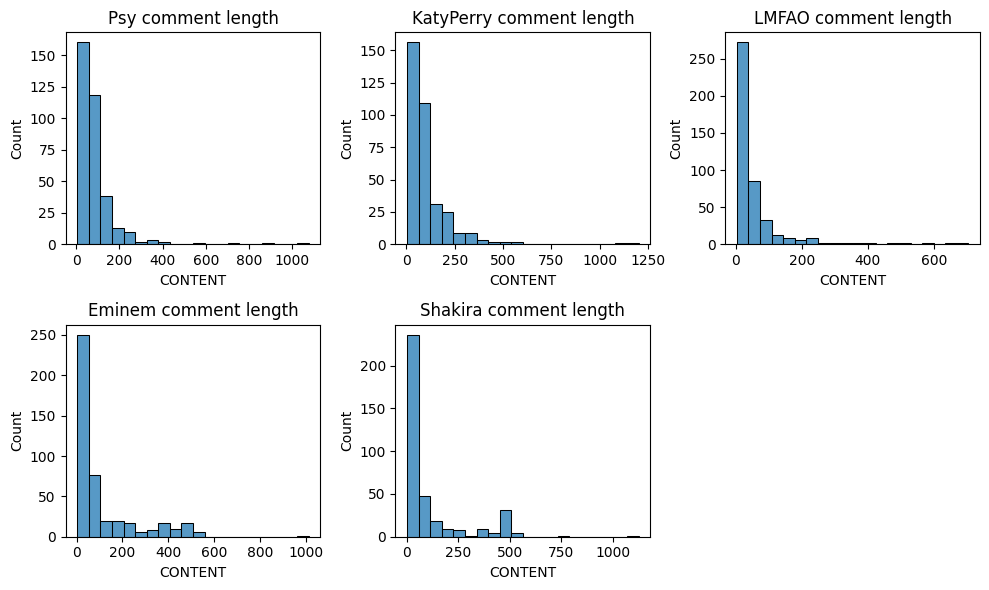

In [8]:
plt.figure(figsize=(10,6))
for i, (name, df) in enumerate(datasets.items()):
    plt.subplot(2,3,i+1)
    sns.histplot(df['CONTENT'].apply(len), bins=20)
    plt.title(f"{name} comment length")
plt.tight_layout()
plt.show()


Insights:  
- LMFAO: short comments → harder for clustering, less semantic content
- Eminem / KatyPerry / Shakira: longer comments → richer text patterns

### Selected Datasets

Based on exploratory data analysis and the defined selection criteria, two datasets are selected for this study:

- **Primary Dataset:** Eminem  
- **Secondary Dataset:** KatyPerry  

The Eminem dataset is selected as the primary dataset due to its larger number of samples (448 comments) and richer textual content, as indicated by the longest average comment length among all datasets. These characteristics make it suitable for meaningful pattern discovery using unsupervised learning and for robust supervised model training.

The KatyPerry dataset is selected as the secondary dataset because it also satisfies the minimum size requirement and exhibits a balanced class distribution with relatively long average comment lengths. Additionally, it represents a different YouTube channel, allowing evaluation of model generalisation across different comment styles.


In [ ]:
selected_celeb = ["Eminem", "KatyPerry"]
datasets_selected = {name: datasets[celeb] for celeb in selected_celeb}

datasets_selected

{'Eminem':                                       COMMENT_ID  \
 0              z12rwfnyyrbsefonb232i5ehdxzkjzjs2   
 1            z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04   
 2              z13vsfqirtavjvu0t22ezrgzyorwxhpf3   
 3            z12wjzc4eprnvja4304cgbbizuved35wxcs   
 4              z13xjfr42z3uxdz2223gx5rrzs3dt5hna   
 ..                                           ...   
 443  LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4   
 444  LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8   
 445  LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8   
 446        z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k   
 447          z13tsbc5vvn0hdozz04chjt51lq1cvris0k   
 
                              AUTHOR                        DATE  \
 0                       Lisa Wellas                         NaN   
 1                      jason graham  2015-05-29T02:26:10.652000   
 2                        Ajkal Khan                         NaN   
 3                     Dakota Taylor  2015-05-29T02:13:07.810000   
 4          

In [ ]:
print("=== Basic Dataset Inspection ===\n")

for celeb, datasets in datasets_selected.items():
    print('Dataset: ', celeb)
    print("Columns: ", datasets.columns)
    print("info:\n", datasets.info())
    print("Describe:\n", datasets.describe())
    print('='*25)
    print()